In [1]:
# it used to predict categorical label
# distinguish image
# probablity class
# continuous data differentiation of house prices
# we can't do y-y_pred
# So we need to have new error matrix it won't apply for classification

In [2]:
# sigmoid(x)=1/(1+e^-x)
# the logistic curve has behaviour of levelling off(0 to 1 output range)
# convert linear regression(continuous target) to logistic regression(categorical target)
# cutoff is 0.5 so if probablity is 90% we will be sure that it has positive outcome

In [3]:
# We will plug in linear regression equation in place of x in sigmoid
# relation between coeff and y_pred
# odds=p/(1-p)
# so to get relation ship we solve for odds
# ln(y_pred/(1-y_pred))=sum(Beta*x)(n times)
# convert y axis in terms of y odds ln(0.5/(1-0.5)=0)
# y axis then in terms of log odd it becomes at +- infinity from 0 to 1
# still beta coef doesn't have direct relation as it is non linear
# But we can gain info line if positive beta increase chance of 1 class with increase i x feature
# vice versa for negative beta
# magnitude of coef with odds on both sides

In [4]:
# Best fit curve in logistic we can do with residual sum of squares
# as the y axis is on +-infinity
# we use maximum likelihood p=e^ln(odds)/(1+e^ln(odds))
# to get best fit choose a linear line and project the points on line then they are not in +-infinity and thenput the odds and plot the sigmoid curve
# it's not perfect as points are in between
# likelihood=0.9*0.8*0.65*0.55*(1-0.9)*(1-0.8)*(1-0.65)*(1-0.55)=0.129
# maximise likehood equal to 1
# Repeat again with different linear regression and learn best coefficient of maximum likelihood
# We need to minimise something for gradient descent log loss(cost function) for best fitting beta coefficient values

In [5]:
# main is log odd and probablity to interpret the coefficients

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('C:/Users/rajsh/Documents/Machine_Learning_notebooks/DATA/hearing_test.csv')

In [8]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [9]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [10]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

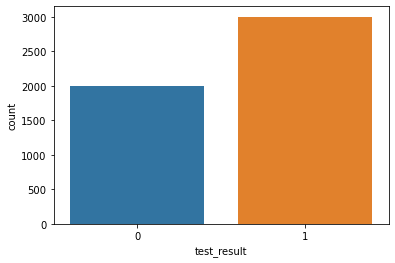

In [12]:
sns.countplot(data=df,x='test_result')
# sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

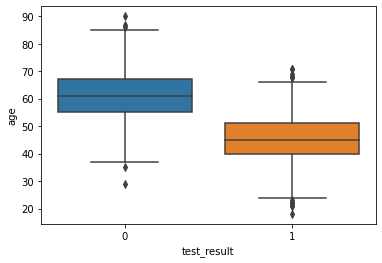

In [14]:
sns.boxplot(x='test_result',y='age',data=df)
# people who pass the test are slightly older

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

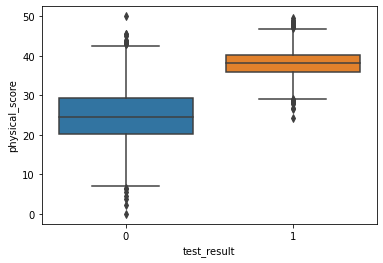

In [15]:
sns.boxplot(x='test_result',y='physical_score',data=df)
# if score is high they pass the test

<AxesSubplot:xlabel='age', ylabel='physical_score'>

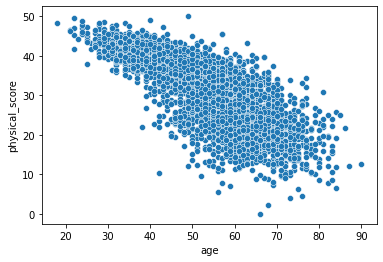

In [16]:
sns.scatterplot(x='age',y='physical_score',data=df)
# age increases physical score decreases

<AxesSubplot:xlabel='age', ylabel='physical_score'>

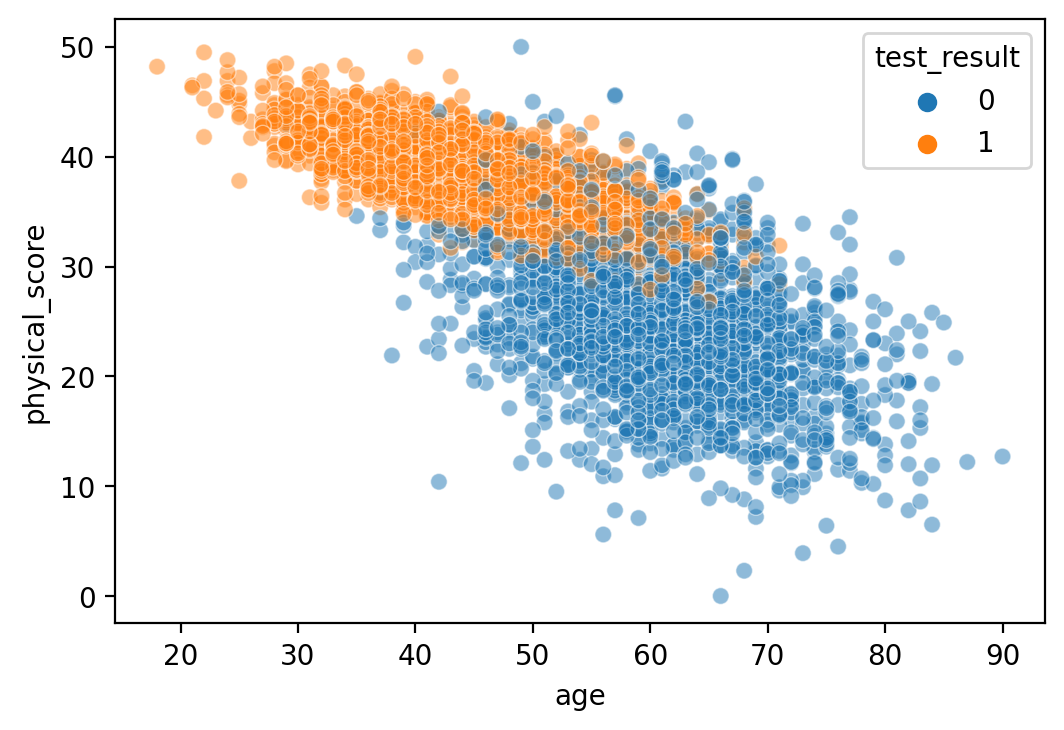

In [20]:
# Younger and more physical score it's more likely to pass hearing test
plt.figure(dpi=200)
sns.scatterplot(x='age',y='physical_score',alpha=0.5,hue='test_result',data=df)

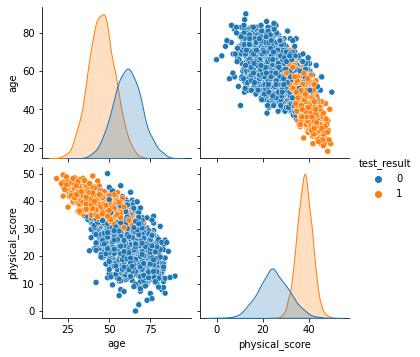

In [21]:
sns.pairplot(data=df,hue='test_result')

<AxesSubplot:>

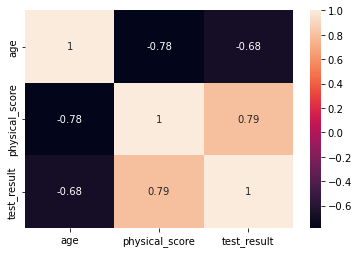

In [22]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

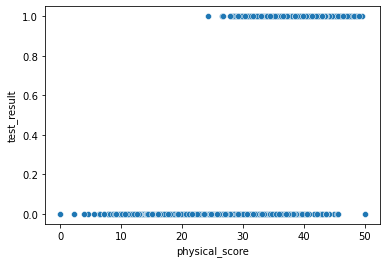

In [24]:
sns.scatterplot(x='physical_score',y='test_result',data=df)
# boxplot is more usefull in this case

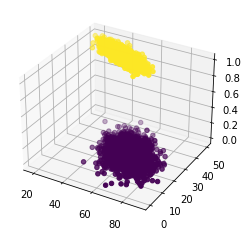

In [26]:
# 3D matplotlib scatterplot
# Difference between people passed and failed the test
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [27]:
X=df.drop('test_result',axis=1)

In [28]:
y=df['test_result']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [32]:
scaler=StandardScaler()

In [33]:
scaled_X_train=scaler.fit_transform(X_train)

In [34]:
scaled_X_test=scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
# help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [37]:
log_model=LogisticRegression()

In [38]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [39]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [55]:
y_pred=log_model.predict(scaled_X_test)

In [56]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [44]:
# y_pred=log_model.predict_proba(scaled_X_test)

In [45]:
# y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [46]:
# confusion matrix to ensure how perfect our model is in predicting the result
# Based in test data
#   Actual
#    I,H
# I=TP,FP
# H=FN,TN

In [47]:
# What is accuracy?
# (TP+TN)/Total
# Chec if this accuracy is enough
# Imagine if we always report back one class still its having high accuracy
# Imbalanced classes
# We should not only rely on accuracy

In [48]:
# Recall(Senstivity)how often can we find this case
# Recall=TP/Total actual positives(TP+FN)
# Here if there is imbalanced dataset
# recall=0 alerts of totally overfitting of the model

In [49]:
# Precision=TP/Total predicted postives(TP+FP)
# Recall and precision doesn't fall to accuracy paradox

In [50]:
# F1 Score(harmonic mean(If any one is zero F1 also becomes zero) of precion and recall)
# Precision and Recall are related through numerator TP
# F1=2*P*R/(P+R)

In [51]:
# ROC Curves
# Trade off between TP and FP(True positive)
# if cutoff of logistic is lowered number of FP and FN gets changed
# AUC-Area under the curveCreating precision vs recall for different cutoffs

In [52]:
# (age,physical)
# if age increses the probality of being 1 class decrease
# likelihoof increases if physical score(it is also a strong predictor)
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [53]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
accuracy_score(y_test,y_pred)
# But there is accuracy paradox due to imbalanced class

0.93

In [58]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [59]:
from sklearn.metrics import plot_confusion_matrix

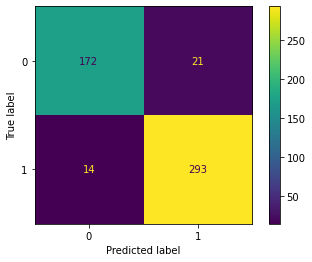

In [60]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)
# if model is performing well FP FN

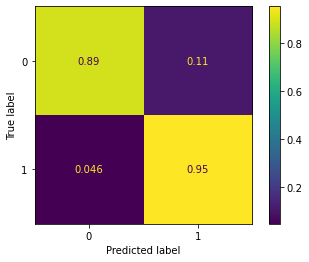

In [61]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [62]:
len(y_test)

500

In [63]:
print(classification_report(y_test,y_pred))
# per call
# precision how many are classified correct among that class
# recall how many of this class are u finding in the whole element of this class

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [64]:
# if precision and recall are near about
# then it is a balanced dataset

In [65]:
from sklearn.metrics import precision_score,recall_score

In [66]:
precision_score(y_test,y_pred)

0.9331210191082803

In [67]:
recall_score(y_test,y_pred)

0.9543973941368078

In [68]:
# Nothing is imbalanced

In [69]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

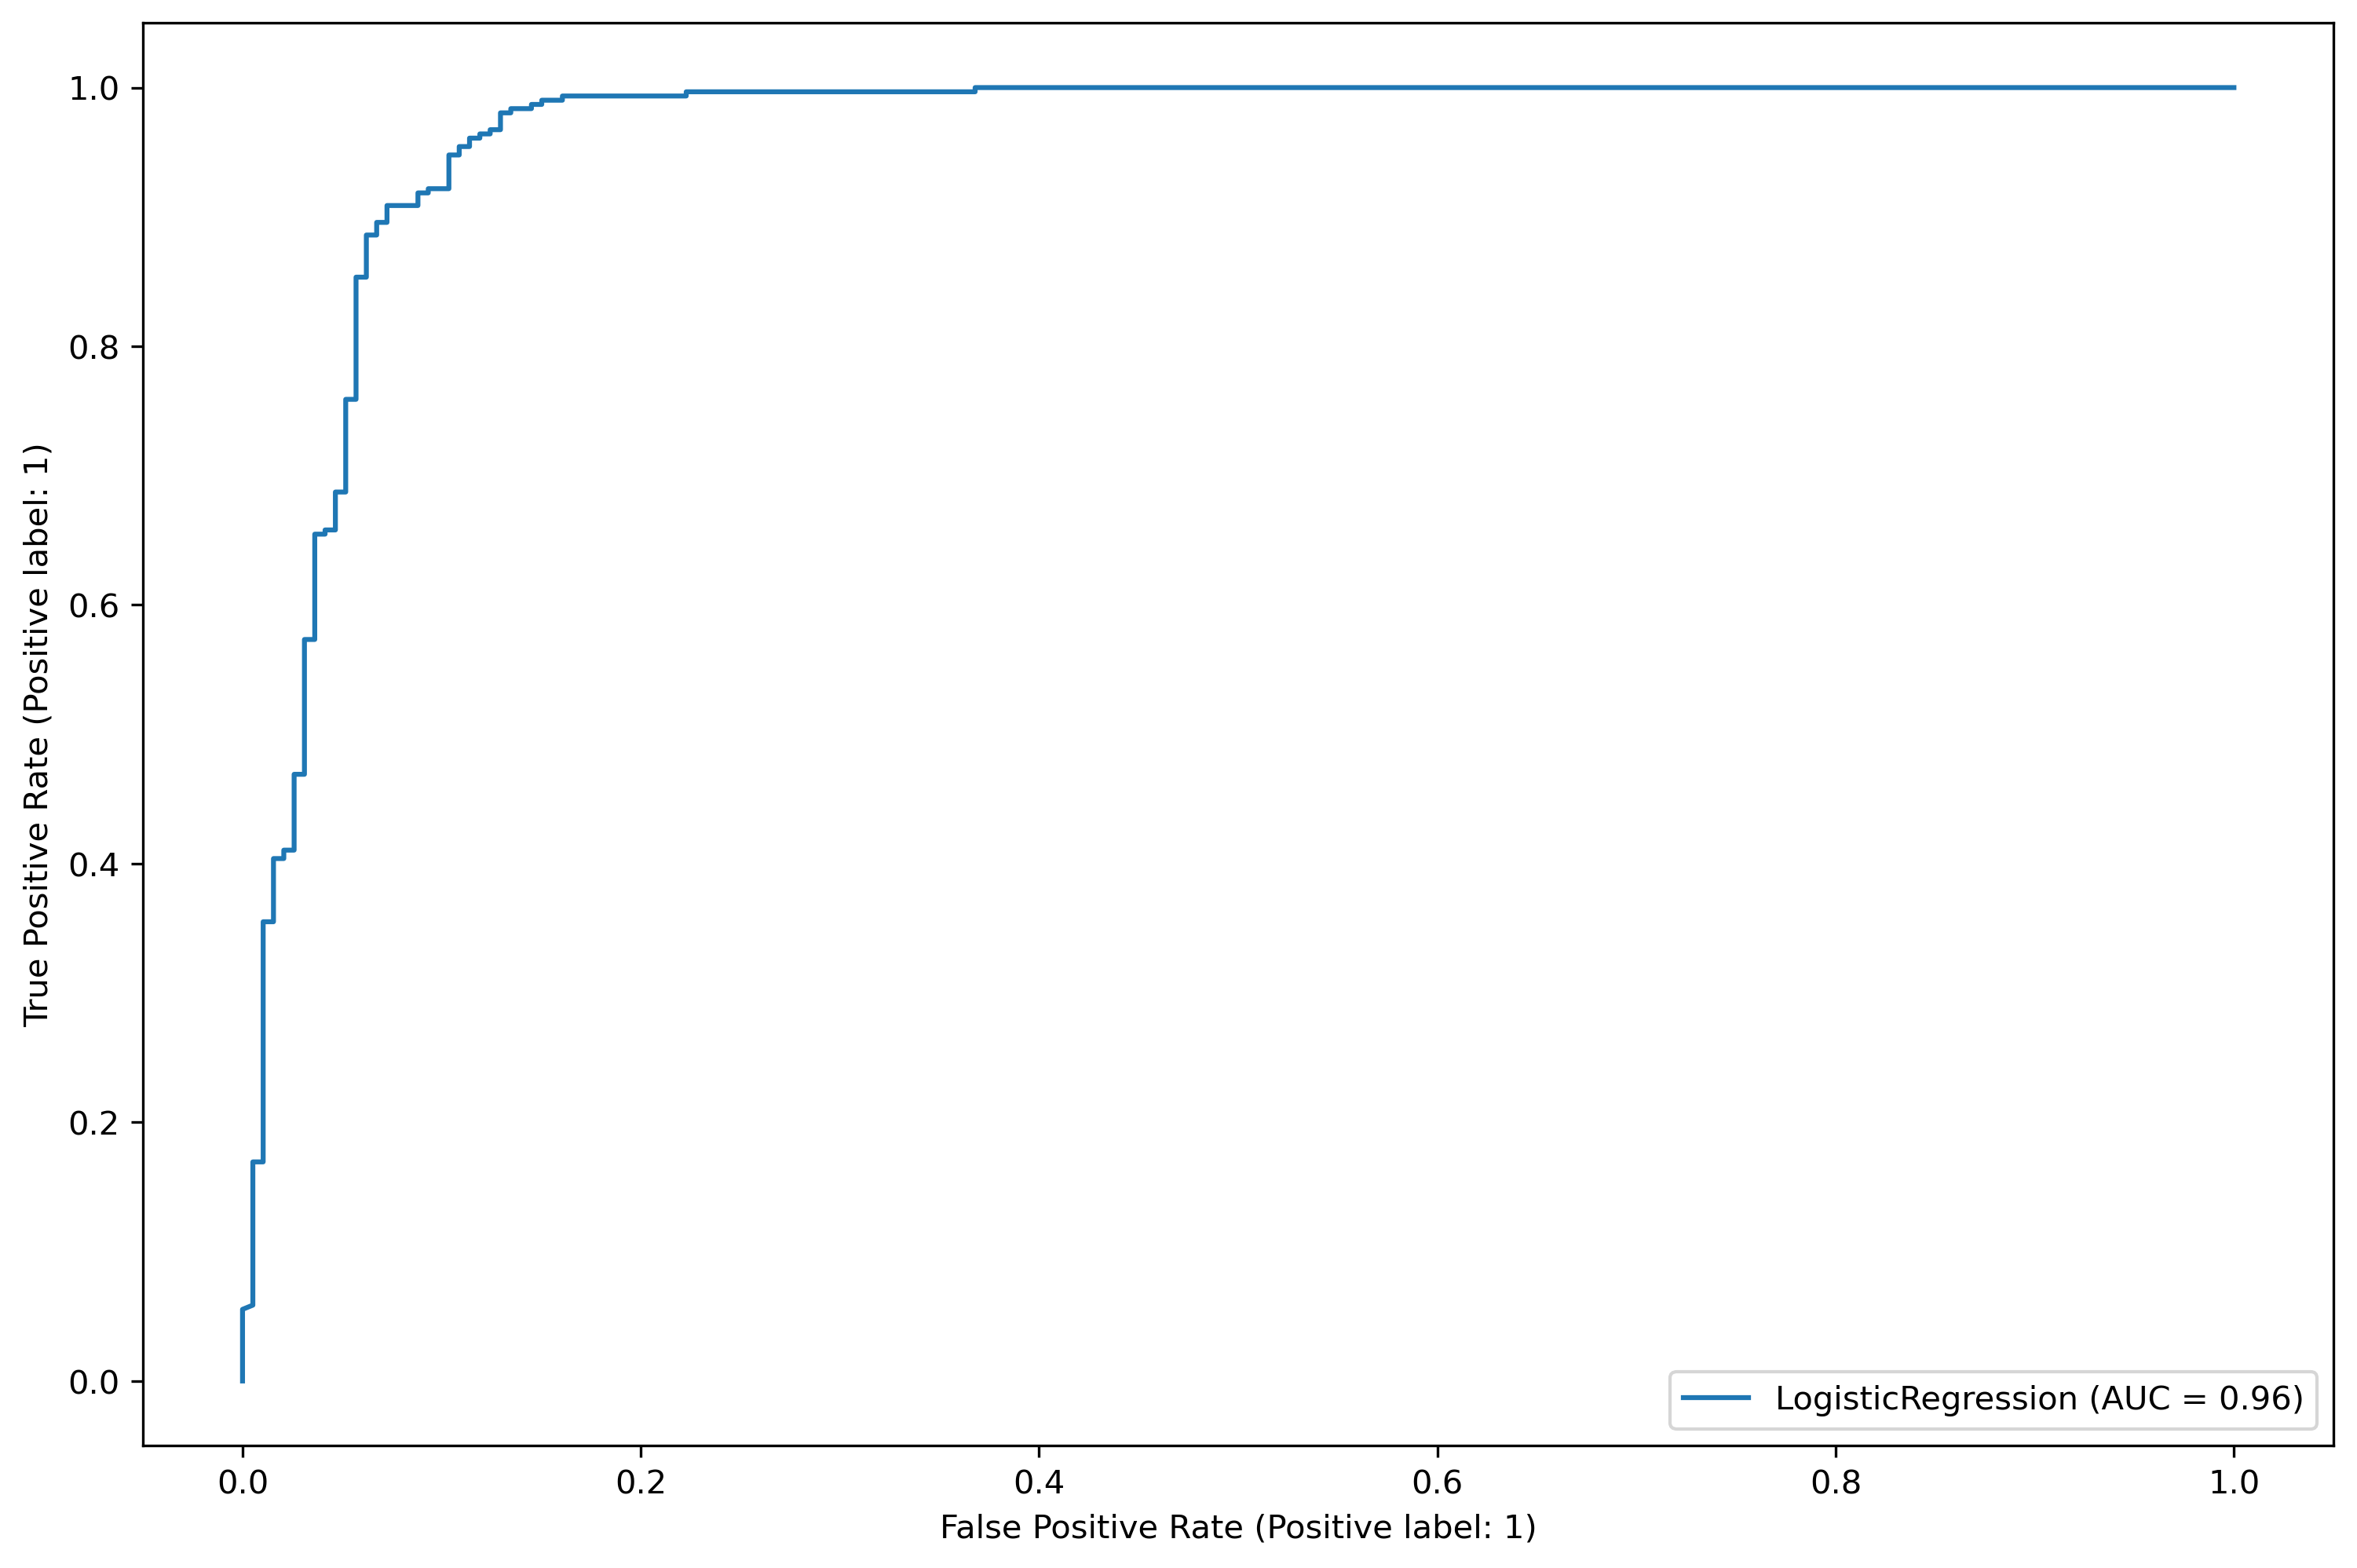

In [71]:
# how to connect scikit function with matplotlib
fig,ax=plt.subplots(figsize=(12,8),dpi=300)
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)

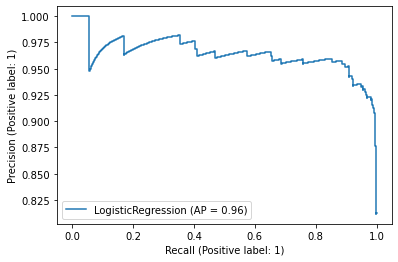

In [72]:
# Not common measuring the tradeoff
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [75]:
log_model.predict_proba(scaled_X_test)

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [78]:
log_model.predict_proba(scaled_X_test)[0]
# 97% chance of class 1

array([0.02384343, 0.97615657])

In [77]:
y_test[0]

1